# Load libraries

In [95]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Load Files

In [96]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Understand your Data

In [97]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [98]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [99]:
numaric_cols = train.select_dtypes(exclude=['object'])
categorical_cols = train.select_dtypes(include=['object'])

In [100]:
print(numaric_cols.columns)
print("-------------------------------")
print(categorical_cols.columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
-------------------------------
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'Bs

In [101]:
numaric_cols.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


Text(0.5, 1.0, 'Features Correlating with Target')

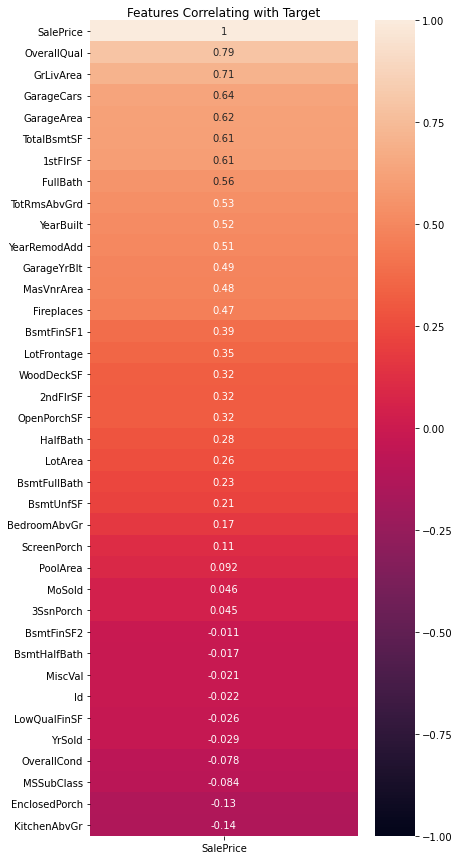

In [102]:
plt.figure(figsize=(6, 15))
heatmap = sns.heatmap(numaric_cols.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Target', fontdict={'fontsize':12}, pad=4)

In [103]:
from sklearn.preprocessing import LabelEncoder
for c in categorical_cols:
    lbl = LabelEncoder() 
    categorical_cols[c] =lbl.fit_transform(list(categorical_cols[c].values))

<ipython-input-103-1083601a8ca5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_cols[c] =lbl.fit_transform(list(categorical_cols[c].values))


In [104]:
categorical_cols.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,2,3,3,0,4,0,5,2,...,1,1,4,4,2,3,4,4,8,4
1,3,1,2,3,3,0,2,0,24,1,...,1,1,4,4,2,3,4,4,8,4
2,3,1,2,0,3,0,4,0,5,2,...,1,1,4,4,2,3,4,4,8,4
3,3,1,2,0,3,0,0,0,6,2,...,5,2,4,4,2,3,4,4,8,0
4,3,1,2,0,3,0,2,0,15,2,...,1,1,4,4,2,3,4,4,8,4


In [105]:
categorical_cols['SalePrice'] = train['SalePrice']

<ipython-input-105-9d59c3657f21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_cols['SalePrice'] = train['SalePrice']


Text(0.5, 1.0, 'Features Correlating with Target')

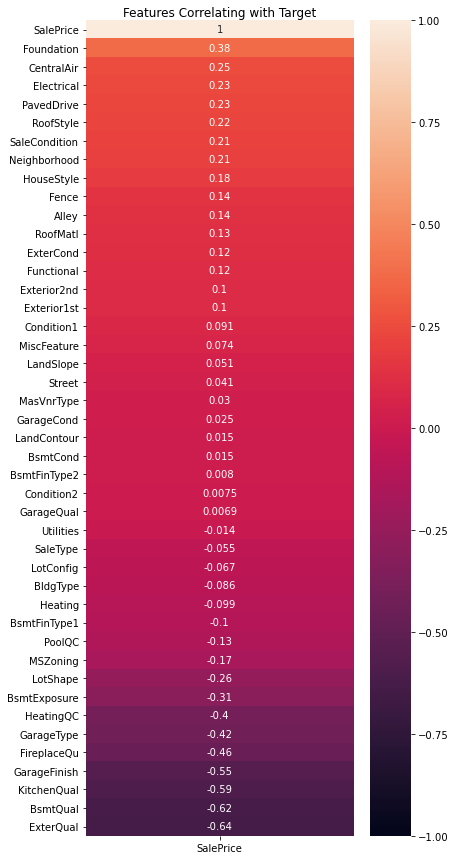

In [106]:
plt.figure(figsize=(6, 15))
heatmap = sns.heatmap(categorical_cols.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Target', fontdict={'fontsize':12}, pad=4)

In [107]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [108]:
cat_features = categorical_cols.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)
num_features = numaric_cols.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)

In [109]:
del_cat_feat= cat_features.index[cat_features['SalePrice'] < 0.1].tolist()
del_num_feat = num_features.index[num_features['SalePrice'] < 0.1].tolist()

In [110]:
train.drop(del_cat_feat,axis=1, inplace = True)
train.drop(del_num_feat,axis=1, inplace = True)

In [111]:
null_values = traintrain.loc[:,train.isnull().sum()>500]
drop_cols = null_values.columns
print(drop_cols)
train.drop(drop_cols,axis=1, inplace = True)

Index(['Alley', 'Fence'], dtype='object')


In [113]:
categorical_cols_new = traintrain.select_dtypes(include=['object'])

In [115]:
for c in categorical_cols_new:
    lbl = LabelEncoder()
    traintrain[c] =lbl.fit_transform(list(train[c].va)ues))

In [116]:
traintrain['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())

In [117]:
Y = traintrain["SalePrice"]
X = train.drop(["SalePrice"],axis=1)

In [118]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1022, 37)
(438, 37)
(1022,)
(438,)


In [119]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(xtrain,ytrain)
print(model.score(xtest,ytest)*100)

84.43434136531297


In [120]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(xtrain,ytrain, 
             early_stopping_rounds=5, 
             eval_set=[(xtrain,ytrain)], 
             verbose=False)
print(my_model.score(xtest,ytest)*100)

85.2463309770442


In [123]:
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()
model_LR.fit(xtrain,ytrain)
print(model_LR.score(xtest,ytest)*100)

79.45143928600305


In [124]:
train.head()

,LotFrontage,LotArea,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,ScreenPorch,SaleCondition,SalePrice
0,65.0,8450,5,5,7,2003,2003,1,1,12,...,0,2003.0,2,548,2,0,61,0,4,208500
1,80.0,9600,24,2,6,1976,1976,1,1,8,...,1,1976.0,2,460,2,298,0,0,4,181500
2,68.0,11250,5,5,7,2001,2002,1,1,12,...,1,2001.0,2,608,2,0,42,0,4,223500
3,60.0,9550,6,5,7,1915,1970,1,1,13,...,1,1998.0,3,642,2,0,35,0,0,140000
4,84.0,14260,15,5,8,2000,2000,1,1,12,...,1,2000.0,3,836,2,192,84,0,4,250000
